This following code implements Thomas C. Schelling. 1978. “Micromotives and Macrobehavior.” Micromotives and Macrobehavior. (pgs 37-38)

Replication of Dining Halls Model by Chen-Shuo Hong (2017) <br />
The fixed distribution of women version draw from Schelling <br />
The unfixed distribution of women and the additional initial conditions draw from James Kitts (2014)

This model is an illustration of spatial distributin and interactive behavior. Namely, one actor's decisions on where to move shape and are shaped by other actors, resulting in evenly or unevenly distribution of all kinds of actors. In terms of scenario, this model applies to "association and proximity - in residence or social gatherings or working places, even marriage." (p.39)

Pseudocode in plain English
1. Assign initial conditions: a. population size of groups. b. number of people who already live in either of two places. 
2. The parameter is the preferred parity level for each group members.
3. For each actor, calculate the parity level in each place, then choose to move to the place whose parity level is closest to the corresponding preferences.
4. If the levels in the two places are equal, randomly assign actor to one place.
5. Calculate the number of actors in two places by groups.

Note: this replication is agent-level, stochastic, asynchronous, discrete-time, discrete-state implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Set Parameters
parity_level = 0.3 # the parity level of men 
random_choice = 0.5 # the chance of choosing one hall when two houses are equally unbalanced

In [3]:
# Set Initial Conditions 1
#men = np.zeros((200, 1), dtype = 'int')
#women = np.ones((250, 1), dtype = 'int')
#A = pd.DataFrame({"House_A_men" : [], "House_A_women" : []})
#B = pd.DataFrame({"House_B_men" : [], "House_B_women" : []})
#House_A = women[0:125]
#House_B = women[125:251]
#unassigned = men

# Set Initial Conditions 2
#men = np.zeros((100, 1), dtype = 'int')
#women = np.ones((120, 1), dtype = 'int')
#A = pd.DataFrame({"House_A_men" : [], "House_A_women" : []})
#B = pd.DataFrame({"House_B_men" : [], "House_B_women" : []})
#House_A = pd.DataFrame([])
#House_B = pd.DataFrame([])
#unassigned = np.append(women, men) # assume both have the same preferences about the parity

# Set Initial Conditions 3
men = np.zeros((200, 1), dtype = 'int')
women = np.ones((250, 1), dtype = 'int')
A = pd.DataFrame({"House_A_men" : [], "House_A_women" : []})
B = pd.DataFrame({"House_B_men" : [], "House_B_women" : []})
House_A = pd.DataFrame([])
House_B = pd.DataFrame([])
unassigned = np.append(women, men) # assume both have the same preferences about the parity
unassigned = np.random.permutation(unassigned)
#print(unassigned)

In [4]:
while len(unassigned) > 0:
    i = 0
    Closeness_House_A = abs(parity_level - np.mean(np.append(House_A, unassigned[i])))
    Closeness_House_B = abs(parity_level - np.mean(np.append(House_B, unassigned[i])))
    if Closeness_House_A < Closeness_House_B:
        House_A = np.append(House_A, unassigned[i])
        unassigned = np.delete(unassigned, [i])
    else:
        if Closeness_House_A > Closeness_House_B:
            House_B = np.append(House_B, unassigned[i])
            unassigned = np.delete(unassigned, [i])
        else:
            if random.uniform(0, 1) < 0.5:
                House_A = np.append(House_A, unassigned[i])
                unassigned = np.delete(unassigned, [i])
            else:
                House_B = np.append(House_B, unassigned[i])
                unassigned = np.delete(unassigned, [i])
    i += 1
    DIST_A = {
        "House_A_men": sum(House_A == 0),
        "House_A_women": sum(House_A == 1)
        }
    DIST_B = {
        "House_B_men": sum(House_B == 0),
        "House_B_women": sum(House_B == 1)
        }
    data_A = pd.DataFrame(DIST_A, index = [i])
    data_B = pd.DataFrame(DIST_B, index = [i])
    A = A.append(data_A)
    B = B.append(data_B)

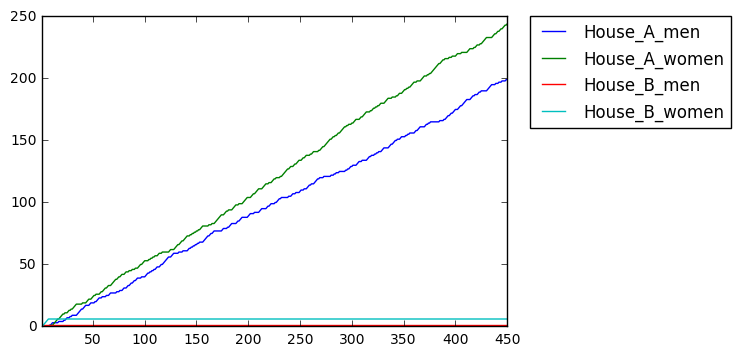

In [5]:
House = pd.concat([A, B], axis=1)
index = House.shape[0]
House.index = range(1, index+1)
House.plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # plot legend outside of graph
plt.show()
#print(House)